In [1]:
import os
#os.chdir('../')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import scvi
print(scvi.__version__)  # Sollte eine Version ausgeben


1.3.0


/data/Tolga/miniconda3/lib/python3.11/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/data/Tolga/miniconda3/lib/python3.11/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [3]:
import scarches as sca


 captum (see https://github.com/pytorch/captum).


In [4]:
import scanpy as sc
import torch
import scarches as sca
#from scarches.dataset.trvae.data_handling import remove_sparsity
import matplotlib.pyplot as plt
import numpy as np
import gdown

In [5]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [6]:
adata_all = sc.read("/data/Tolga/Bioinformatics/akne_healthy_filtered.h5ad")

In [7]:
adata_all

AnnData object with n_obs × n_vars = 3144 × 20835
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_Source', 'Group', 'percent_mito', 'log1p_total_counts', 'log1p_n_genes_by_counts', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'barcode', 'UMAP_1', 'UMAP_2', 'batch_id', 'str_batch', 'Factor Value[inferred cell type - authors labels]'
    var: 'highly_variable', 'gene_name'
    uns: 'seurat_clusters_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'norm'

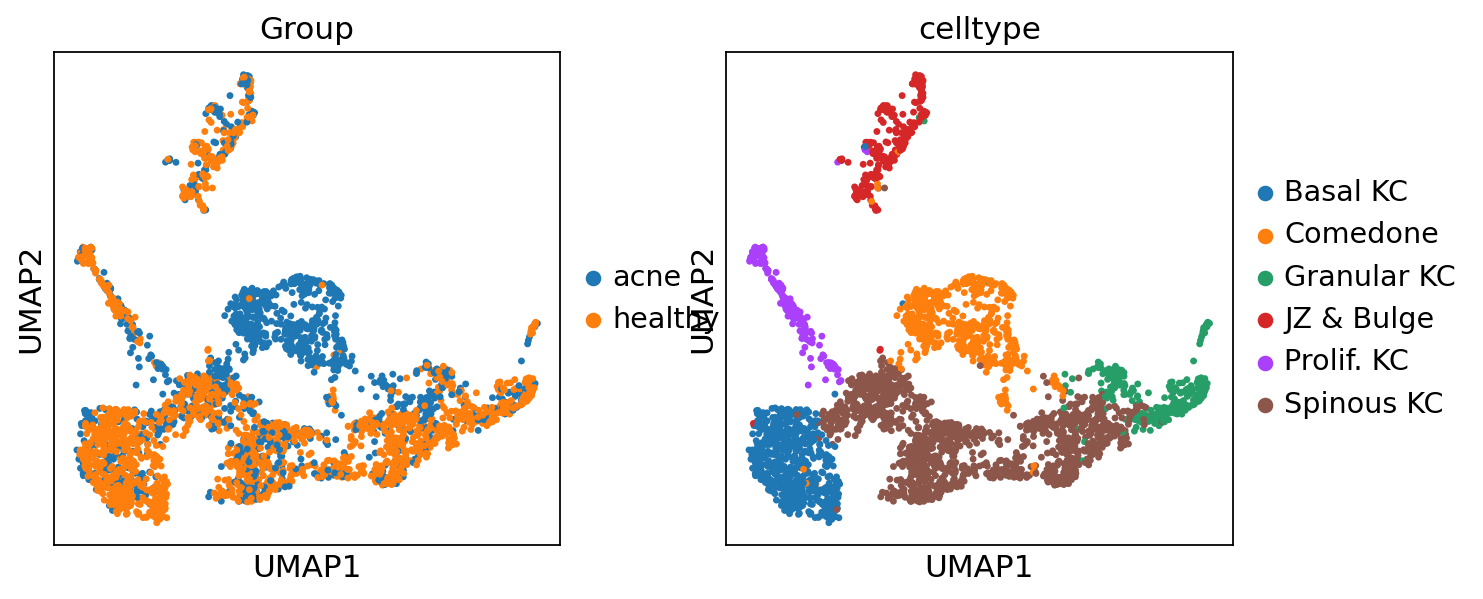

In [8]:
sc.pl.umap(adata_all, color =["Group", "celltype"])

In [9]:
condition_key = 'Group'
cell_type_key = 'celltype'
target_conditions = ['acne']


trvae_epochs = 500
surgery_epochs = 500

early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss",
    "threshold": 0,
    "patience": 20,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

In [10]:
adata_all.X = adata_all.layers["counts"].copy()

In [11]:
adata_all

AnnData object with n_obs × n_vars = 3144 × 20835
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_Source', 'Group', 'percent_mito', 'log1p_total_counts', 'log1p_n_genes_by_counts', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'barcode', 'UMAP_1', 'UMAP_2', 'batch_id', 'str_batch', 'Factor Value[inferred cell type - authors labels]'
    var: 'highly_variable', 'gene_name'
    uns: 'seurat_clusters_colors', 'Group_colors', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'norm'

In [12]:
adata_all.raw = adata_all.copy()

In [13]:
adata = adata_all.raw.to_adata()

In [14]:
adata

AnnData object with n_obs × n_vars = 3144 × 20835
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_Source', 'Group', 'percent_mito', 'log1p_total_counts', 'log1p_n_genes_by_counts', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'barcode', 'UMAP_1', 'UMAP_2', 'batch_id', 'str_batch', 'Factor Value[inferred cell type - authors labels]'
    var: 'highly_variable', 'gene_name'
    uns: 'seurat_clusters_colors', 'Group_colors', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'

In [15]:
adata.X = adata.X.todense()

In [16]:
adata.X

array([[0, 0, 0, 0, 1, 0, 0, ..., 1, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, ..., 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 7, 4, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, ..., 0, 0, 4, 4, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, ..., 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0]])

In [17]:
source_adata = adata[~adata.obs[condition_key].isin(target_conditions)]
target_adata = adata[adata.obs[condition_key].isin(target_conditions)]
source_conditions = source_adata.obs[condition_key].unique().tolist()

In [18]:
source_adata

View of AnnData object with n_obs × n_vars = 1779 × 20835
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_Source', 'Group', 'percent_mito', 'log1p_total_counts', 'log1p_n_genes_by_counts', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'barcode', 'UMAP_1', 'UMAP_2', 'batch_id', 'str_batch', 'Factor Value[inferred cell type - authors labels]'
    var: 'highly_variable', 'gene_name'
    uns: 'seurat_clusters_colors', 'Group_colors', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'

In [19]:
target_adata

View of AnnData object with n_obs × n_vars = 1365 × 20835
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_Source', 'Group', 'percent_mito', 'log1p_total_counts', 'log1p_n_genes_by_counts', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'barcode', 'UMAP_1', 'UMAP_2', 'batch_id', 'str_batch', 'Factor Value[inferred cell type - authors labels]'
    var: 'highly_variable', 'gene_name'
    uns: 'seurat_clusters_colors', 'Group_colors', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'

In [20]:
source_conditions

['healthy']

In [22]:
source_adata = source_adata.copy()

In [25]:
target_adata = target_adata.copy()

In [23]:
sca.models.SCVI.setup_anndata(source_adata, batch_key=condition_key)

In [24]:
sca.__version__

'0.6.1'

In [28]:
vae = sca.models.SCVI(
    source_adata,
    n_layers=2,
    encode_covariates=True,
    deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none",
)

In [29]:
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


In [30]:
reference_latent = sc.AnnData(vae.get_latent_representation())
reference_latent.obs["cell_type"] = source_adata.obs[cell_type_key].tolist()
reference_latent.obs["batch"] = source_adata.obs[condition_key].tolist()

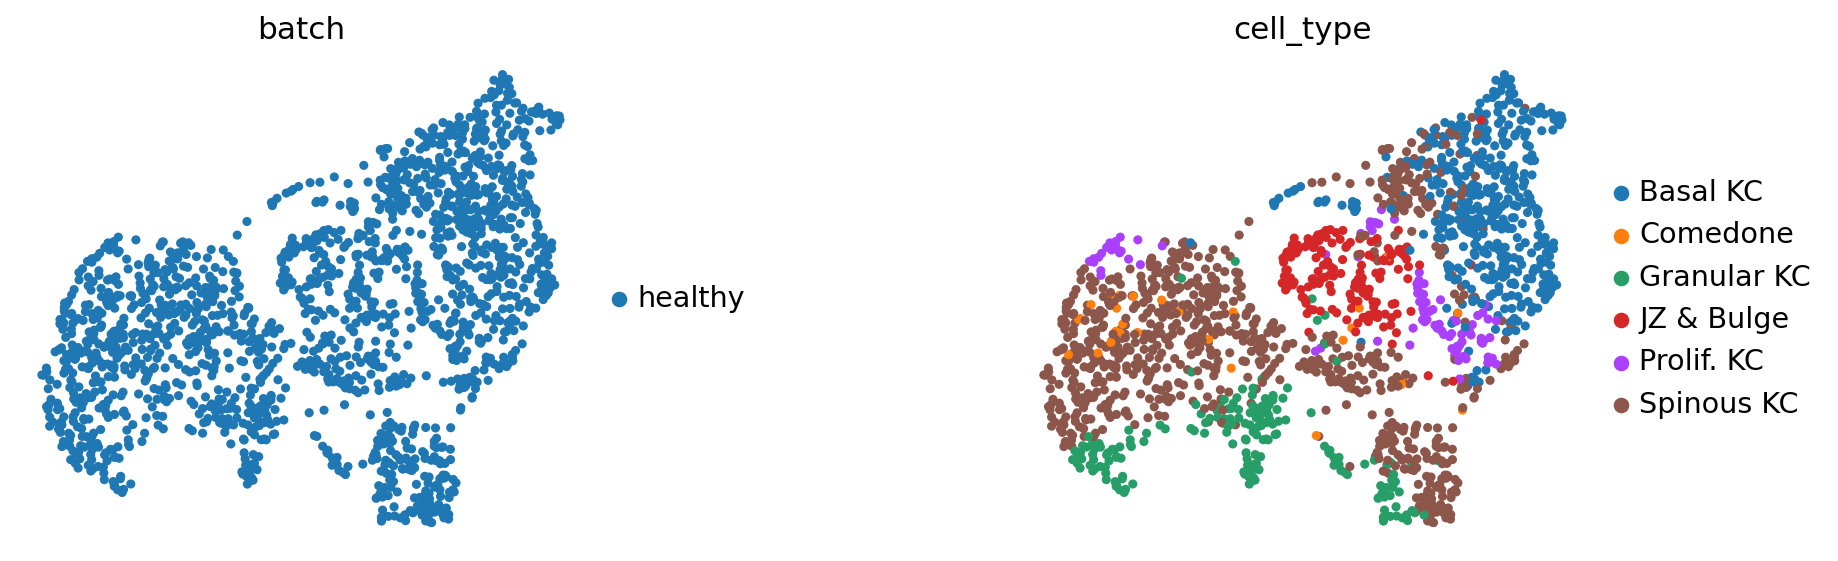

In [31]:
sc.pp.neighbors(reference_latent, n_neighbors=8)
sc.tl.leiden(reference_latent)
sc.tl.umap(reference_latent)
sc.pl.umap(reference_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           )

In [32]:
ref_path = 'ref_model/'
vae.save(ref_path, overwrite=True)

In [33]:
model = sca.models.SCVI.load_query_data(
    target_adata,
    ref_path,
    freeze_dropout = True,
)



INFO     File ref_model/model.pt already downloaded                                                                


In [34]:
model.train(max_epochs=200, plan_kwargs=dict(weight_decay=0.0))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training:   0%|          | 0/200 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [35]:
query_latent = sc.AnnData(model.get_latent_representation())
query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

<Figure size 320x320 with 0 Axes>

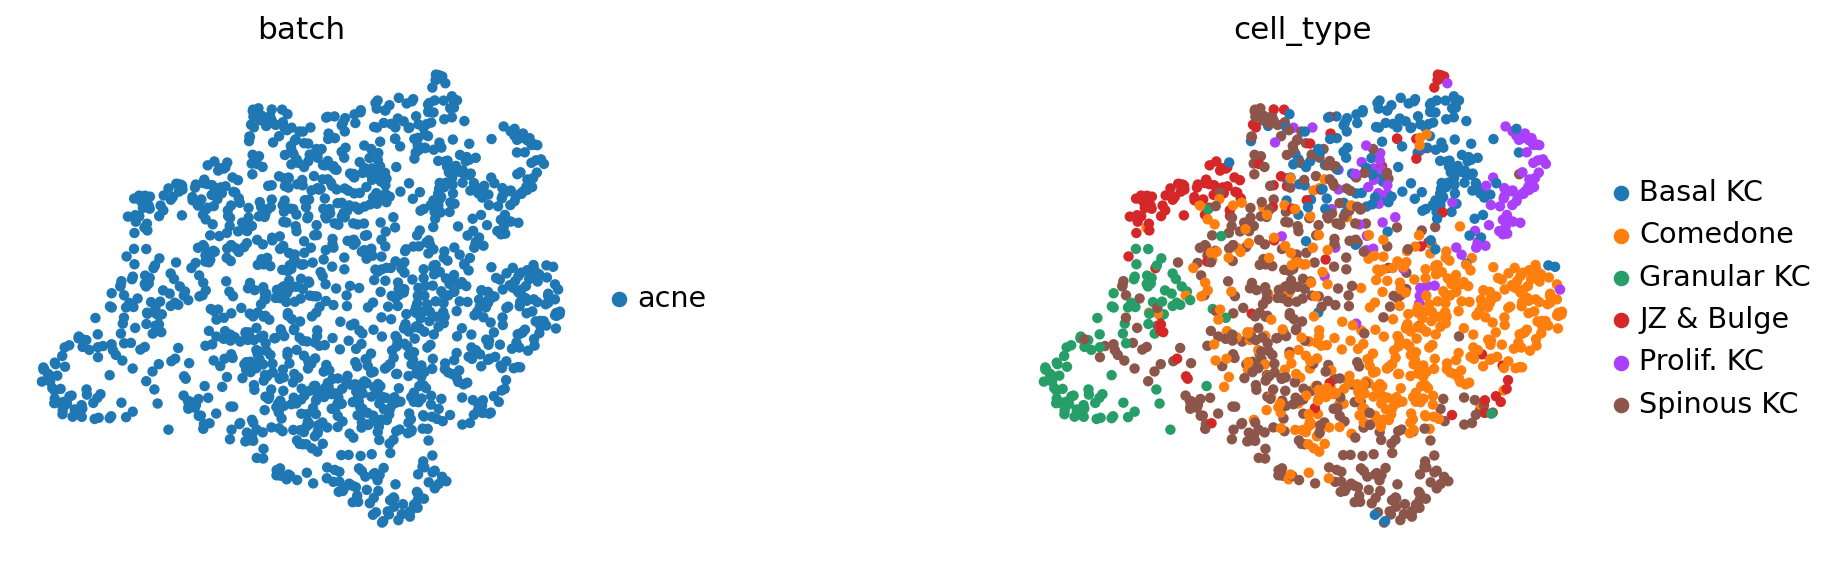

In [36]:
sc.pp.neighbors(query_latent)
sc.tl.leiden(query_latent)
sc.tl.umap(query_latent)
plt.figure()
sc.pl.umap(
    query_latent,
    color=["batch", "cell_type"],
    frameon=False,
    wspace=0.6,
)

In [37]:
surgery_path = 'surgery_model'
model.save(surgery_path, overwrite=True)

In [42]:
help(concatenate())

NameError: name 'concatenate' is not defined

In [38]:
adata_full = source_adata.concatenate(target_adata)
full_latent = sc.AnnData(model.get_latent_representation(adata=adata_full))
full_latent.obs['cell_type'] = adata_full.obs[cell_type_key].tolist()
full_latent.obs['batch'] = adata_full.obs[condition_key].tolist()

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


<Figure size 320x320 with 0 Axes>

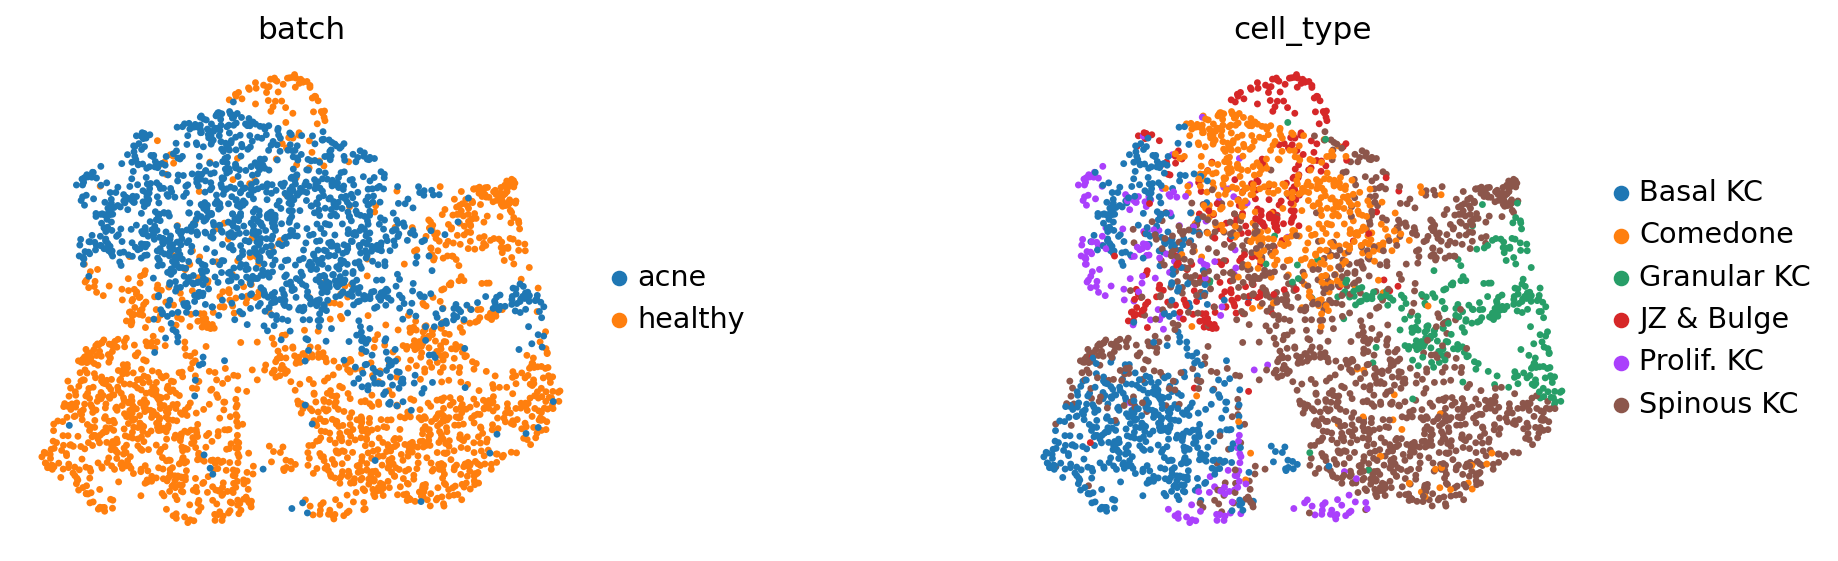

In [39]:
sc.pp.neighbors(full_latent)
sc.tl.leiden(full_latent)
sc.tl.umap(full_latent)
plt.figure()
sc.pl.umap(
    full_latent,
    color=["batch", "cell_type"],
    frameon=False,
    wspace=0.6,
)

